In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("wine_data.csv",header = None,usecols = [0,1,2])
df.columns = ['Class label','Alcohol','Malic acid']

In [5]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [28]:
df.shape

(178, 3)

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

<Axes: xlabel='Alcohol', ylabel='Density'>

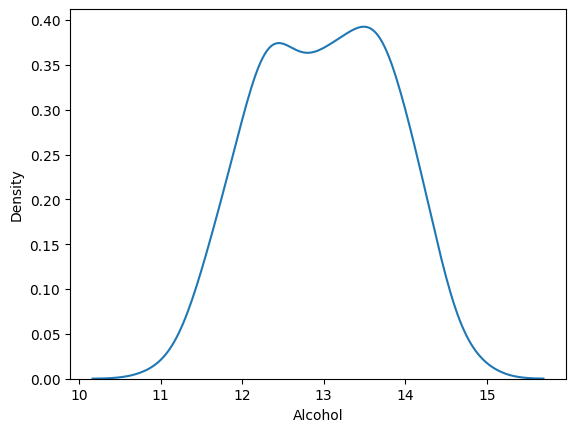

In [11]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

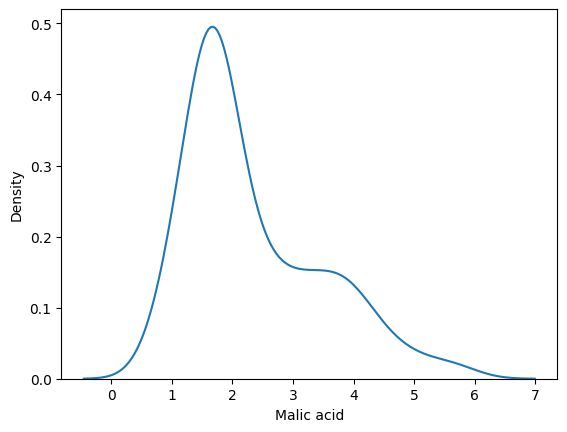

In [14]:
sns.kdeplot(df['Malic acid'])

In [24]:
x = df.drop('Class label',axis=1)
x

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [22]:
y = df['Class label']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class label, Length: 178, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
x_train.shape

(124, 2)

In [29]:
x_test.shape

(54, 2)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [31]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [33]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [34]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


<Axes: title={'center': 'after scalling'}, xlabel='Alcohol', ylabel='Density'>

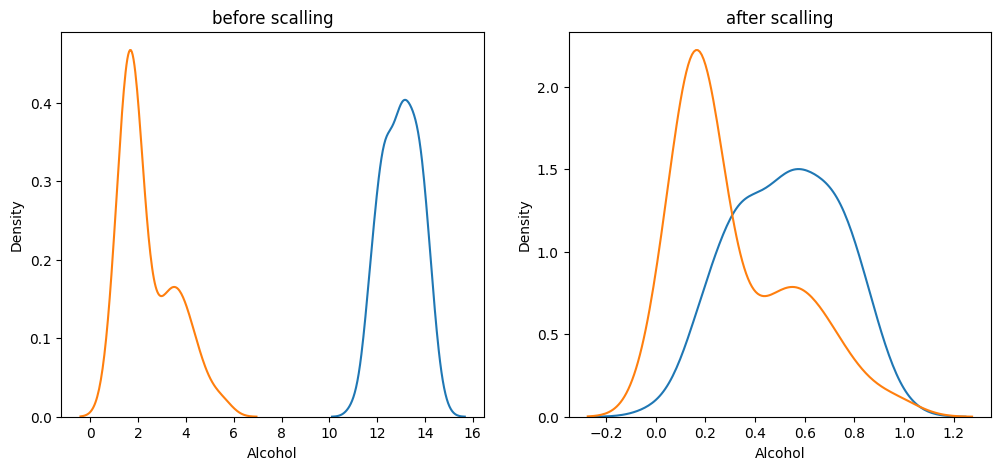

In [40]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('before scalling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

ax2.set_title('after scalling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)